In [230]:
import pandas as pd
from ydata_profiling import ProfileReport
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [231]:
df = pd.read_csv("customer_sales.csv")

In [232]:
df

Order ID Order Date     Customer Name         Country  \
0     BN-2011-7407039     1/1/11        Ruby Patel          Sweden   
1     AZ-2011-9050313     1/3/11    Summer Hayward  United Kingdom   
2     AZ-2011-6674300     1/4/11  Devin Huddleston          France   
3     BN-2011-2819714     1/4/11       Mary Parker  United Kingdom   
4     BN-2011-2819714     1/4/11       Mary Parker  United Kingdom   
...               ...        ...               ...             ...   
8042   AZ-2014-766953   12/31/14      Jose Gambino  United Kingdom   
8043  BN-2014-4140795   12/31/14   Daniel Hamilton     Netherlands   
8044  BN-2014-4140795   12/31/14   Daniel Hamilton     Netherlands   
8045  BN-2014-4140795   12/31/14   Daniel Hamilton     Netherlands   
8046   AZ-2014-766953   12/31/14      Jose Gambino  United Kingdom   

                     State        City   Region      Segment     Ship Mode  \
0                Stockholm   Stockholm    North  Home Office  Economy Plus   
1                  England   Southport    North     Consumer       Economy   
2     Auvergne-Rhône-Alpes     Valence  Central     Consumer       Economy   
3                  England  Birmingham    North    Corporate       Economy   
4                  England  Birmingham    North    Corporate       Economy   
...                    ...         ...      ...          ...           ...   
8042               England  Maidenhead    North    Corporate       Economy   
8043         North Brabant   Eindhoven  Central  Home Office  Economy Plus   
8044         North Brabant   Eindhoven  Central  Home Office  Economy Plus   
8045         North Brabant   Eindhoven  Central  Home Office  Economy Plus   
8046               England  Maidenhead    North    Corporate       Economy   

             Category Sub-Category                           Product Name  \
0     Office Supplies        Paper            Enermax Note Cards, Premium   
1           Furniture    Bookcases     Dania Corner Shelving, Traditional   
2     Office Supplies          Art  Binney & Smith Sketch Pad, Easy-Erase   
3     Office Supplies          Art             Boston Markers, Easy-Erase   
4     Office Supplies      Storage            Eldon Folders, Single Width   
...               ...          ...                                    ...   
8042        Furniture    Bookcases   Ikea Stackable Bookrack, Traditional   
8043  Office Supplies          Art      BIC Pencil Sharpener, Fluorescent   
8044  Office Supplies      Binders          Avery Binder Covers, Recycled   
8045       Technology     Machines                    StarTech Phone, Red   
8046       Technology       Phones              Motorola Audio Dock, VoIP   

      Discount Sales  Profit  Quantity  
0          0.5   $45   -26.0       3.0  
1          0.0  $854   290.0       7.0  
2          0.0  $140    21.0       3.0  
3          0.5   $27   -22.0       2.0  
4          0.5   $17    -1.0       2.0  
...        ...   ...     ...       ...  
8042       0.0  $245    91.0       2.0  
8043       0.5   $30   -10.0       2.0  
8044       0.5   $23    -6.0       4.0  
8045       0.5  $108   -19.0       3.0  
8046       0.0  $867   251.0       5.0  

[8047 rows x 16 columns]

## Step 1: Understanding the Dataset

### 1. Are there any missing values in the dataset?

In [233]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [234]:
df.isnull().sum()

Order ID          0
Order Date        6
Customer Name     1
Country           1
State             4
City              4
Region            0
Segment           1
Ship Mode         5
Category          5
Sub-Category      0
Product Name      0
Discount          7
Sales             2
Profit           13
Quantity         13
dtype: int64

In [235]:
df = df.dropna(subset=['Sales'])

In [236]:
df.isnull().sum()

Order ID          0
Order Date        6
Customer Name     1
Country           1
State             4
City              4
Region            0
Segment           1
Ship Mode         5
Category          5
Sub-Category      0
Product Name      0
Discount          7
Sales             0
Profit           13
Quantity         13
dtype: int64

### 2. What is the range of dates in the dataset?

In [237]:
df.describe()

Discount       Profit     Quantity
count  8038.000000  8032.000000  8032.000000
mean      0.112105    34.962774     3.769173
std       0.183034   177.470407     2.201358
min       0.000000 -3060.000000     1.000000
25%       0.000000     1.000000     2.000000
50%       0.000000    14.000000     3.000000
75%       0.100000    47.000000     5.000000
max       0.900000  2476.000000    14.000000

In [238]:
df.dtypes

Order ID          object
Order Date        object
Customer Name     object
Country           object
State             object
City              object
Region            object
Segment           object
Ship Mode         object
Category          object
Sub-Category      object
Product Name      object
Discount         float64
Sales             object
Profit           float64
Quantity         float64
dtype: object

In [239]:
df['Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y')

/var/folders/6p/2g1rvv2s0z102jczh_4msgdc0000gp/T/ipykernel_71081/2031250011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y')


In [240]:
print("Minimum Date in the dataset=", df['Date'].min())
print("Maximum Date in the dataset=", df['Date'].max())

Minimum Date in the dataset= 2011-01-01 00:00:00
Maximum Date in the dataset= 2014-12-31 00:00:00


### 3. How many unique customers are there in the dataset?
- We can also find this information in the profiling report

In [241]:
# Check for missing values in the 'Customer Name' column
missing_customers = df['Customer Name'].isna().sum()
print(f"Number of missing customer names: {missing_customers}")


Number of missing customer names: 1


In [242]:
# Since there is only 1 customer name missing, I will be dropping that record
df = df.dropna(subset=['Customer Name'])
# Verify that missing values are dropped
missing_customers = df['Customer Name'].isna().sum()
print(f"Number of missing customer names after dropping: {missing_customers}")


Number of missing customer names after dropping: 0


In [243]:
# Also normalize customer names (strip extra spaces)
df['Customer Name'] = df['Customer Name'].str.strip()
# Count unique customer names after cleaning
unique_customers = df['Customer Name'].nunique()
print(f"Number of unique customers: {unique_customers}")
# There is an assumption made over here that each customer name is unique, as in there are no 2 people names Sam Smith in different locations etc. This is done because the dataset does not have customer ID as a column.

Number of unique customers: 792


### 4. How many unique orders are there in the dataset?
- We can also find this information in the profiling report

In [244]:
unique_orders = df['Order ID'].nunique()
print(f"Number of unique orders: {unique_orders}")

Number of unique orders: 4117


### 5. Profile the data to give the standard descriptive statistics for the Sales field. What are the min, max,variance, and standard deviations?

In [245]:
# Remove $ symbol
df['Sales'] = df['Sales'].astype(str).str.replace(r'[\$,]', '', regex=True)
# We need to convert to float to get the correct stats
df['Sales'] = df['Sales'].astype(float)
# Check the data type for Sales
print(df.dtypes)

Order ID                 object
Order Date               object
Customer Name            object
Country                  object
State                    object
City                     object
Region                   object
Segment                  object
Ship Mode                object
Category                 object
Sub-Category             object
Product Name             object
Discount                float64
Sales                   float64
Profit                  float64
Quantity                float64
Date             datetime64[ns]
dtype: object


In [246]:
sales_stats = df['Sales'].describe()
sales_stats

count      8044.000000
mean        342.581551
std        3218.271790
min        -110.000000
25%          48.000000
50%         116.000000
75%         313.000000
max      206000.000000
Name: Sales, dtype: float64

In [247]:
# Also calculate Variance
variance = df['Sales'].var()

print(f"Min: {sales_stats['min']}")
print(f"Max: {sales_stats['max']}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {sales_stats['std']}")

Min: -110.0
Max: 206000.0
Variance: 10357273.311389066
Standard Deviation: 3218.2717895462256


In [248]:
# Checking the 'negative' sales value
negative_sales = df.loc[df['Sales'] < 0]

In [249]:
# Found 3 negative Sales rows
negative_sales

Order ID Order Date  Customer Name         Country  \
180   BN-2011-1399750    3/15/11  Wanda Wingert  United Kingdom   
7327  AZ-2014-6494772   10/16/14     Kian Sykes          France   
7328  AZ-2014-6494772   10/16/14     Kian Sykes          France   

                           State        City   Region   Segment  Ship Mode  \
180                      England      London    North  Consumer  Immediate   
7327  Provence-Alpes-Côte d'Azur  Carpentras  Central  Consumer   Priority   
7328  Provence-Alpes-Côte d'Azur  Carpentras  Central  Consumer   Priority   

             Category Sub-Category                  Product Name  Discount  \
180   Office Supplies          Art     Binney & Smith Pens, Blue       0.1   
7327  Office Supplies          Art  Stanley Markers, Fluorescent       0.0   
7328  Office Supplies      Binders     Cardinal Index Tab, Clear       0.0   

      Sales  Profit  Quantity       Date  
180  -110.0     4.0       1.0 2011-03-15  
7327  -70.0    24.0       3.0 2014-10-16  
7328  -47.0    20.0       7.0 2014-10-16

### 6. Do transaction amounts (sales) in general increase over time (perhaps due to inflation)?

In [250]:
df_sales_trend = df.groupby(df['Date'].dt.year)['Sales'].sum().reset_index()
df_sales_trend

Date     Sales
0  2011.0  615501.0
1  2012.0  548880.0
2  2013.0  836018.0
3  2014.0  754796.0

Text(0, 0.5, 'Transaction Amounts (Sales)')

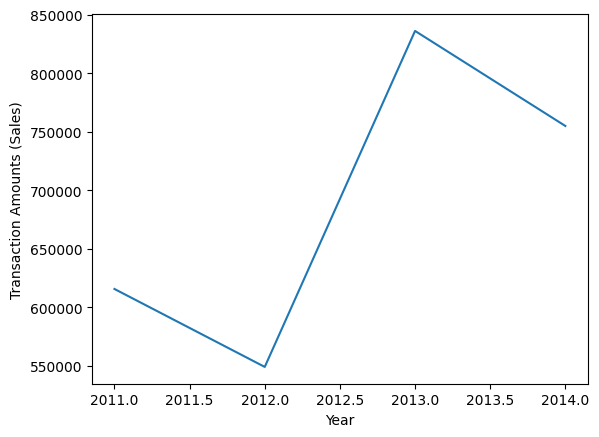

In [251]:
plt.plot(df_sales_trend['Date'], df_sales_trend['Sales'])
plt.xlabel("Year")
plt.ylabel("Transaction Amounts (Sales)")

From 2011 to 2012, the sales declined, from 2012 to 2013, there was a pretty sharp increase in sales. This could potentially be attributed to inflation. However, the sales declined again from 2013 to 2014. While inflation could overall lead to a overall increase in sales over time, it seems that there are other varibles in play here as well that have influenced the transaction amount (sales) trends. 

## Step 2: Explore the dataset

### 1. Are there any outliers or values that don’t make sense? You can use statistical tests to check for outliers. Or, you can simply plot the histogram of the Sales and see if there is any value that appears to be abnormal.

In [252]:
# Since we found negative sales previously, remove them.
# Remove rows where 'Sales' is negative
df = df[df['Sales'] >= 0]

In [253]:
df

Order ID Order Date     Customer Name         Country  \
0     BN-2011-7407039     1/1/11        Ruby Patel          Sweden   
1     AZ-2011-9050313     1/3/11    Summer Hayward  United Kingdom   
2     AZ-2011-6674300     1/4/11  Devin Huddleston          France   
3     BN-2011-2819714     1/4/11       Mary Parker  United Kingdom   
4     BN-2011-2819714     1/4/11       Mary Parker  United Kingdom   
...               ...        ...               ...             ...   
8042   AZ-2014-766953   12/31/14      Jose Gambino  United Kingdom   
8043  BN-2014-4140795   12/31/14   Daniel Hamilton     Netherlands   
8044  BN-2014-4140795   12/31/14   Daniel Hamilton     Netherlands   
8045  BN-2014-4140795   12/31/14   Daniel Hamilton     Netherlands   
8046   AZ-2014-766953   12/31/14      Jose Gambino  United Kingdom   

                     State        City   Region      Segment     Ship Mode  \
0                Stockholm   Stockholm    North  Home Office  Economy Plus   
1                  England   Southport    North     Consumer       Economy   
2     Auvergne-Rhône-Alpes     Valence  Central     Consumer       Economy   
3                  England  Birmingham    North    Corporate       Economy   
4                  England  Birmingham    North    Corporate       Economy   
...                    ...         ...      ...          ...           ...   
8042               England  Maidenhead    North    Corporate       Economy   
8043         North Brabant   Eindhoven  Central  Home Office  Economy Plus   
8044         North Brabant   Eindhoven  Central  Home Office  Economy Plus   
8045         North Brabant   Eindhoven  Central  Home Office  Economy Plus   
8046               England  Maidenhead    North    Corporate       Economy   

             Category Sub-Category                           Product Name  \
0     Office Supplies        Paper            Enermax Note Cards, Premium   
1           Furniture    Bookcases     Dania Corner Shelving, Traditional   
2     Office Supplies          Art  Binney & Smith Sketch Pad, Easy-Erase   
3     Office Supplies          Art             Boston Markers, Easy-Erase   
4     Office Supplies      Storage            Eldon Folders, Single Width   
...               ...          ...                                    ...   
8042        Furniture    Bookcases   Ikea Stackable Bookrack, Traditional   
8043  Office Supplies          Art      BIC Pencil Sharpener, Fluorescent   
8044  Office Supplies      Binders          Avery Binder Covers, Recycled   
8045       Technology     Machines                    StarTech Phone, Red   
8046       Technology       Phones              Motorola Audio Dock, VoIP   

      Discount  Sales  Profit  Quantity       Date  
0          0.5   45.0   -26.0       3.0 2011-01-01  
1          0.0  854.0   290.0       7.0 2011-01-03  
2          0.0  140.0    21.0       3.0 2011-01-04  
3          0.5   27.0   -22.0       2.0 2011-01-04  
4          0.5   17.0    -1.0       2.0 2011-01-04  
...        ...    ...     ...       ...        ...  
8042       0.0  245.0    91.0       2.0 2014-12-31  
8043       0.5   30.0   -10.0       2.0 2014-12-31  
8044       0.5   23.0    -6.0       4.0 2014-12-31  
8045       0.5  108.0   -19.0       3.0 2014-12-31  
8046       0.0  867.0   251.0       5.0 2014-12-31  

[8041 rows x 17 columns]

In [254]:
#Checking that the negative values have been removed from the df
df.sort_values(by='Sales')

Order ID Order Date      Customer Name         Country  \
381    AZ-2011-309750    5/19/11  Milla Hollinworth           Spain   
2162  BN-2012-8400051    6/29/12    Kristen Holland          Sweden   
7097  BN-2014-5531507    9/15/14       Kayla Tearle          Sweden   
3388   AZ-2013-273412    1/14/13     Zachary Warner         Austria   
1185  BN-2011-5491702   11/16/11      Claudia Poore          Sweden   
...               ...        ...                ...             ...   
7590  AZ-2014-6530154   11/19/14        Bettie Lang          France   
3196  AZ-2012-9218935   12/13/12         Lara Giles  United Kingdom   
868   AZ-2011-5313166     9/8/11     Alexander Bond           Spain   
28    BN-2011-4913858    1/13/11       Julian Dobie     Netherlands   
5246   AZ-2013-467128    12/4/13        John Basser         Germany   

                            State          City   Region    Segment  \
381             Castile-La Mancha        Toledo    South  Corporate   
2162                    Stockholm         Solna    North   Consumer   
7097                    Stockholm     Stockholm    North  Corporate   
3388                       Vienna        Vienna  Central   Consumer   
1185                    Stockholm     Stockholm    North  Corporate   
...                           ...           ...      ...        ...   
7590  Nord-Pas-de-Calais-Picardie         Lille  Central   Consumer   
3196                      England  Huddersfield    North   Consumer   
868                       Galicia          Lugo    South  Corporate   
28                  South Holland     Dordrecht  Central   Consumer   
5246                      Hamburg       Hamburg  Central  Corporate   

         Ship Mode         Category Sub-Category  \
381        Economy  Office Supplies        Paper   
2162       Economy  Office Supplies       Labels   
7097       Economy  Office Supplies       Labels   
3388     Immediate  Office Supplies      Binders   
1185       Economy  Office Supplies      Binders   
...            ...              ...          ...   
7590       Economy        Furniture       Chairs   
3196       Economy       Technology       Phones   
868   Economy Plus  Office Supplies   Appliances   
28         Economy  Office Supplies      Storage   
5246       Economy  Office Supplies    Envelopes   

                                    Product Name  Discount     Sales  Profit  \
381                 Xerox Memo Slips, Multicolor       0.0       0.0     0.0   
2162  Hon Round Labels, Laser Printer Compatible       0.5       3.0    -1.0   
7097            Hon Removable Labels, Adjustable       0.5       4.0    -3.0   
3388     Wilson Jones Hole Reinforcements, Clear       0.0       4.0     0.0   
1185          Ibico Hole Reinforcements, Durable       0.5       4.0    -2.0   
...                                          ...       ...       ...     ...   
7590  Hon Executive Leather Armchair, Adjustable       0.1    5729.0    64.0   
3196              Motorola Smart Phone, Cordless       0.0    5785.0   405.0   
868                 Hamilton Beach Stove, Silver       0.0    6517.0  2476.0   
28                           Smead Lockers, Blue       0.5  198000.0  -131.0   
5246          Kraft Peel and Seal, Security-Tint       0.0  206000.0    33.0   

      Quantity       Date  
381        1.0 2011-05-19  
2162       1.0 2012-06-29  
7097       1.0 2014-09-15  
3388       1.0 2013-01-14  
1185       1.0 2011-11-16  
...        ...        ...  
7590      14.0 2014-11-19  
3196       9.0 2012-12-13  
868       12.0 2011-09-08  
28         2.0 2011-01-13  
5246       9.0 2013-12-04  

[8041 rows x 17 columns]

Text(0, 0.5, 'Date')

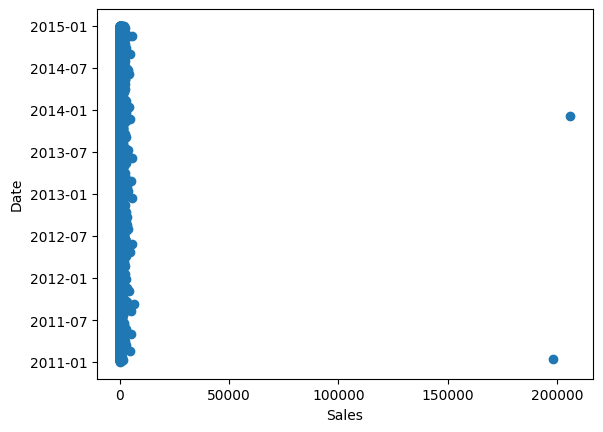

In [255]:
plt.scatter(df['Sales'], df['Date'])
plt.xlabel('Sales')
plt.ylabel('Date')

We can see a few outliers for Sales with very high values.

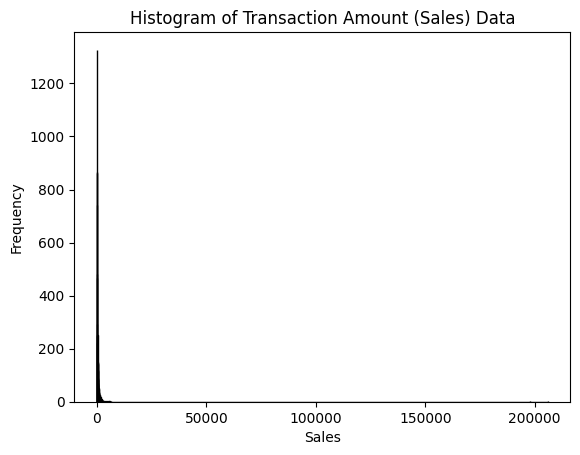

In [256]:
plt.hist(df['Sales'], bins='auto', edgecolor='black')
plt.title('Histogram of Transaction Amount (Sales) Data')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()
# Not very useful graph to check the distribution in this case

In [257]:
# Display the top 10 outliers
df.sort_values(by= 'Sales', inplace = True, ascending = False)
df

Order ID Order Date      Customer Name         Country  \
5246   AZ-2013-467128    12/4/13        John Basser         Germany   
28    BN-2011-4913858    1/13/11       Julian Dobie     Netherlands   
868   AZ-2011-5313166     9/8/11     Alexander Bond           Spain   
3196  AZ-2012-9218935   12/13/12         Lara Giles  United Kingdom   
7590  AZ-2014-6530154   11/19/14        Bettie Lang          France   
...               ...        ...                ...             ...   
7097  BN-2014-5531507    9/15/14       Kayla Tearle          Sweden   
3388   AZ-2013-273412    1/14/13     Zachary Warner         Austria   
1185  BN-2011-5491702   11/16/11      Claudia Poore          Sweden   
2162  BN-2012-8400051    6/29/12    Kristen Holland          Sweden   
381    AZ-2011-309750    5/19/11  Milla Hollinworth           Spain   

                            State          City   Region    Segment  \
5246                      Hamburg       Hamburg  Central  Corporate   
28                  South Holland     Dordrecht  Central   Consumer   
868                       Galicia          Lugo    South  Corporate   
3196                      England  Huddersfield    North   Consumer   
7590  Nord-Pas-de-Calais-Picardie         Lille  Central   Consumer   
...                           ...           ...      ...        ...   
7097                    Stockholm     Stockholm    North  Corporate   
3388                       Vienna        Vienna  Central   Consumer   
1185                    Stockholm     Stockholm    North  Corporate   
2162                    Stockholm         Solna    North   Consumer   
381             Castile-La Mancha        Toledo    South  Corporate   

         Ship Mode         Category Sub-Category  \
5246       Economy  Office Supplies    Envelopes   
28         Economy  Office Supplies      Storage   
868   Economy Plus  Office Supplies   Appliances   
3196       Economy       Technology       Phones   
7590       Economy        Furniture       Chairs   
...            ...              ...          ...   
7097       Economy  Office Supplies       Labels   
3388     Immediate  Office Supplies      Binders   
1185       Economy  Office Supplies      Binders   
2162       Economy  Office Supplies       Labels   
381        Economy  Office Supplies        Paper   

                                    Product Name  Discount     Sales  Profit  \
5246          Kraft Peel and Seal, Security-Tint       0.0  206000.0    33.0   
28                           Smead Lockers, Blue       0.5  198000.0  -131.0   
868                 Hamilton Beach Stove, Silver       0.0    6517.0  2476.0   
3196              Motorola Smart Phone, Cordless       0.0    5785.0   405.0   
7590  Hon Executive Leather Armchair, Adjustable       0.1    5729.0    64.0   
...                                          ...       ...       ...     ...   
7097            Hon Removable Labels, Adjustable       0.5       4.0    -3.0   
3388     Wilson Jones Hole Reinforcements, Clear       0.0       4.0     0.0   
1185          Ibico Hole Reinforcements, Durable       0.5       4.0    -2.0   
2162  Hon Round Labels, Laser Printer Compatible       0.5       3.0    -1.0   
381                 Xerox Memo Slips, Multicolor       0.0       0.0     0.0   

      Quantity       Date  
5246       9.0 2013-12-04  
28         2.0 2011-01-13  
868       12.0 2011-09-08  
3196       9.0 2012-12-13  
7590      14.0 2014-11-19  
...        ...        ...  
7097       1.0 2014-09-15  
3388       1.0 2013-01-14  
1185       1.0 2011-11-16  
2162       1.0 2012-06-29  
381        1.0 2011-05-19  

[8041 rows x 17 columns]

From the scatter plot and by manually inspecting the Sales outliers, we can remove the first two rows which was very high values (that seem out of place).

In [258]:
df = df.iloc[2:].reset_index(drop=True)
df

Order ID Order Date      Customer Name         Country  \
0     AZ-2011-5313166     9/8/11     Alexander Bond           Spain   
1     AZ-2012-9218935   12/13/12         Lara Giles  United Kingdom   
2     AZ-2014-6530154   11/19/14        Bettie Lang          France   
3     BN-2013-2755077     6/4/13      George To Rot           Spain   
4     AZ-2012-5752966    5/29/12     Harrison Cooke  United Kingdom   
...               ...        ...                ...             ...   
8034  BN-2014-5531507    9/15/14       Kayla Tearle          Sweden   
8035   AZ-2013-273412    1/14/13     Zachary Warner         Austria   
8036  BN-2011-5491702   11/16/11      Claudia Poore          Sweden   
8037  BN-2012-8400051    6/29/12    Kristen Holland          Sweden   
8038   AZ-2011-309750    5/19/11  Milla Hollinworth           Spain   

                            State          City   Region    Segment  \
0                         Galicia          Lugo    South  Corporate   
1                         England  Huddersfield    North   Consumer   
2     Nord-Pas-de-Calais-Picardie         Lille  Central   Consumer   
3                Castile and León    Valladolid    South  Corporate   
4                         England         Luton    North   Consumer   
...                           ...           ...      ...        ...   
8034                    Stockholm     Stockholm    North  Corporate   
8035                       Vienna        Vienna  Central   Consumer   
8036                    Stockholm     Stockholm    North  Corporate   
8037                    Stockholm         Solna    North   Consumer   
8038            Castile-La Mancha        Toledo    South  Corporate   

         Ship Mode         Category Sub-Category  \
0     Economy Plus  Office Supplies   Appliances   
1          Economy       Technology       Phones   
2          Economy        Furniture       Chairs   
3     Economy Plus       Technology       Phones   
4        Immediate       Technology       Phones   
...            ...              ...          ...   
8034       Economy  Office Supplies       Labels   
8035     Immediate  Office Supplies      Binders   
8036       Economy  Office Supplies      Binders   
8037       Economy  Office Supplies       Labels   
8038       Economy  Office Supplies        Paper   

                                    Product Name  Discount   Sales  Profit  \
0                   Hamilton Beach Stove, Silver       0.0  6517.0  2476.0   
1                 Motorola Smart Phone, Cordless       0.0  5785.0   405.0   
2     Hon Executive Leather Armchair, Adjustable       0.1  5729.0    64.0   
3                      Samsung Smart Phone, VoIP       0.1  5726.0  -445.0   
4                   Nokia Smart Phone, Full Size       0.0  5725.0  2461.0   
...                                          ...       ...     ...     ...   
8034            Hon Removable Labels, Adjustable       0.5     4.0    -3.0   
8035     Wilson Jones Hole Reinforcements, Clear       0.0     4.0     0.0   
8036          Ibico Hole Reinforcements, Durable       0.5     4.0    -2.0   
8037  Hon Round Labels, Laser Printer Compatible       0.5     3.0    -1.0   
8038                Xerox Memo Slips, Multicolor       0.0     0.0     0.0   

      Quantity       Date  
0         12.0 2011-09-08  
1          9.0 2012-12-13  
2         14.0 2014-11-19  
3         10.0 2013-06-04  
4          9.0 2012-05-29  
...        ...        ...  
8034       1.0 2014-09-15  
8035       1.0 2013-01-14  
8036       1.0 2011-11-16  
8037       1.0 2012-06-29  
8038       1.0 2011-05-19  

[8039 rows x 17 columns]

In [259]:
# This sorted df looks good now and is free of any major outliers after removing negative Sales records and large values.
df.sort_values(by= 'Sales', inplace= True, ascending = True)
df

Order ID Order Date      Customer Name         Country  \
8038   AZ-2011-309750    5/19/11  Milla Hollinworth           Spain   
8037  BN-2012-8400051    6/29/12    Kristen Holland          Sweden   
8035   AZ-2013-273412    1/14/13     Zachary Warner         Austria   
8034  BN-2014-5531507    9/15/14       Kayla Tearle          Sweden   
8036  BN-2011-5491702   11/16/11      Claudia Poore          Sweden   
...               ...        ...                ...             ...   
4     AZ-2012-5752966    5/29/12     Harrison Cooke  United Kingdom   
3     BN-2013-2755077     6/4/13      George To Rot           Spain   
2     AZ-2014-6530154   11/19/14        Bettie Lang          France   
1     AZ-2012-9218935   12/13/12         Lara Giles  United Kingdom   
0     AZ-2011-5313166     9/8/11     Alexander Bond           Spain   

                            State          City   Region    Segment  \
8038            Castile-La Mancha        Toledo    South  Corporate   
8037                    Stockholm         Solna    North   Consumer   
8035                       Vienna        Vienna  Central   Consumer   
8034                    Stockholm     Stockholm    North  Corporate   
8036                    Stockholm     Stockholm    North  Corporate   
...                           ...           ...      ...        ...   
4                         England         Luton    North   Consumer   
3                Castile and León    Valladolid    South  Corporate   
2     Nord-Pas-de-Calais-Picardie         Lille  Central   Consumer   
1                         England  Huddersfield    North   Consumer   
0                         Galicia          Lugo    South  Corporate   

         Ship Mode         Category Sub-Category  \
8038       Economy  Office Supplies        Paper   
8037       Economy  Office Supplies       Labels   
8035     Immediate  Office Supplies      Binders   
8034       Economy  Office Supplies       Labels   
8036       Economy  Office Supplies      Binders   
...            ...              ...          ...   
4        Immediate       Technology       Phones   
3     Economy Plus       Technology       Phones   
2          Economy        Furniture       Chairs   
1          Economy       Technology       Phones   
0     Economy Plus  Office Supplies   Appliances   

                                    Product Name  Discount   Sales  Profit  \
8038                Xerox Memo Slips, Multicolor       0.0     0.0     0.0   
8037  Hon Round Labels, Laser Printer Compatible       0.5     3.0    -1.0   
8035     Wilson Jones Hole Reinforcements, Clear       0.0     4.0     0.0   
8034            Hon Removable Labels, Adjustable       0.5     4.0    -3.0   
8036          Ibico Hole Reinforcements, Durable       0.5     4.0    -2.0   
...                                          ...       ...     ...     ...   
4                   Nokia Smart Phone, Full Size       0.0  5725.0  2461.0   
3                      Samsung Smart Phone, VoIP       0.1  5726.0  -445.0   
2     Hon Executive Leather Armchair, Adjustable       0.1  5729.0    64.0   
1                 Motorola Smart Phone, Cordless       0.0  5785.0   405.0   
0                   Hamilton Beach Stove, Silver       0.0  6517.0  2476.0   

      Quantity       Date  
8038       1.0 2011-05-19  
8037       1.0 2012-06-29  
8035       1.0 2013-01-14  
8034       1.0 2014-09-15  
8036       1.0 2011-11-16  
...        ...        ...  
4          9.0 2012-05-29  
3         10.0 2013-06-04  
2         14.0 2014-11-19  
1          9.0 2012-12-13  
0         12.0 2011-09-08  

[8039 rows x 17 columns]

### 2. Does giving discounts increase sales and/or profits? Make a graph to show that. Comment on what happens at 80% discount level, and what’s the optimum level for maximizing total profit.

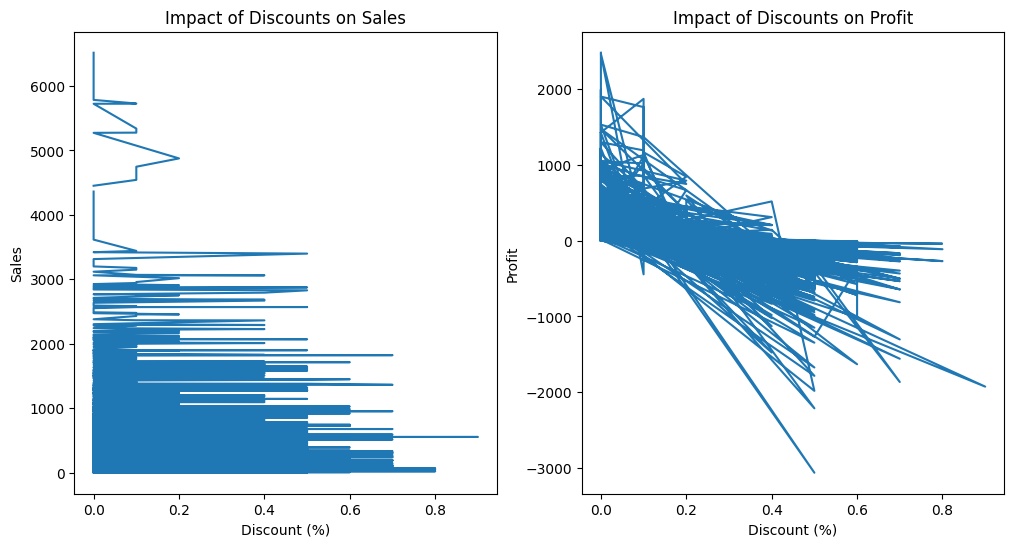

In [260]:
# Create subplots for sales and profit
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Sales
axs[0].plot(df['Discount'], df['Sales'])
axs[0].set_title("Impact of Discounts on Sales")
axs[0].set_xlabel("Discount (%)")
axs[0].set_ylabel("Sales")

# Profit
axs[1].plot(df['Discount'], df['Profit'])
axs[1].set_title("Impact of Discounts on Profit")
axs[1].set_xlabel("Discount (%)")
axs[1].set_ylabel("Profit")
plt.style.use('default')
plt.show()

Here, the Discount is on the x-axis, and Sales is on the y-axis. This way, we can see how changes in the discount level (independent variable) affect the sales amount (dependent variable).

1. Impact of Discount on Sales
- Overall Trend: The sales have a large spread at lower discount levels (upto ~30%). As the discount level increases, the sales appear to decrease or remain at lower levels.
- 80% Discount level: At this level, the sales amount seem to be relatively low, showing that by offering such a huge discount does not necessarily lead to larger sales amounts. This suggests that extreme discounts do not automatically drive high-value transactions.
2. Impact of Discount on Profits
- Overall Trend: As the discount % increases, profits decrease a lot, pretty steeply. Higher discounts (above 20%) lead to profits becoming negative, showing that higher discounts significantly reduce profitability.
- 80% Discount level: At this level, profits are going into negative which means that such high discounts results in a loss, as the costs probably outweigh any revenue generated from the sales.

Optimal Discount Level for Maximizing Profit: This seems to be between 0% and 10%, where profit remains positive and stable. High discounts, particularly above 20%, are detrimental to both sales and profits. 

### 3. What factors affect the sales the most? You can run a simple regression to understand the impact. 

In [261]:
# df['Order Date'].isnull().sum()
# Since there are only 6 null values for Dates, dropping these rows for the analysis further.
df = df.dropna(subset=['Date'])

In [262]:
df['Year'] = df['Date'].dt.year
df['Year'] = df['Year'].astype('int')
df

/var/folders/6p/2g1rvv2s0z102jczh_4msgdc0000gp/T/ipykernel_71081/3222407761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
/var/folders/6p/2g1rvv2s0z102jczh_4msgdc0000gp/T/ipykernel_71081/3222407761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype('int')


Order ID Order Date      Customer Name         Country  \
8038   AZ-2011-309750    5/19/11  Milla Hollinworth           Spain   
8037  BN-2012-8400051    6/29/12    Kristen Holland          Sweden   
8035   AZ-2013-273412    1/14/13     Zachary Warner         Austria   
8034  BN-2014-5531507    9/15/14       Kayla Tearle          Sweden   
8036  BN-2011-5491702   11/16/11      Claudia Poore          Sweden   
...               ...        ...                ...             ...   
4     AZ-2012-5752966    5/29/12     Harrison Cooke  United Kingdom   
3     BN-2013-2755077     6/4/13      George To Rot           Spain   
2     AZ-2014-6530154   11/19/14        Bettie Lang          France   
1     AZ-2012-9218935   12/13/12         Lara Giles  United Kingdom   
0     AZ-2011-5313166     9/8/11     Alexander Bond           Spain   

                            State          City   Region    Segment  \
8038            Castile-La Mancha        Toledo    South  Corporate   
8037                    Stockholm         Solna    North   Consumer   
8035                       Vienna        Vienna  Central   Consumer   
8034                    Stockholm     Stockholm    North  Corporate   
8036                    Stockholm     Stockholm    North  Corporate   
...                           ...           ...      ...        ...   
4                         England         Luton    North   Consumer   
3                Castile and León    Valladolid    South  Corporate   
2     Nord-Pas-de-Calais-Picardie         Lille  Central   Consumer   
1                         England  Huddersfield    North   Consumer   
0                         Galicia          Lugo    South  Corporate   

         Ship Mode         Category Sub-Category  \
8038       Economy  Office Supplies        Paper   
8037       Economy  Office Supplies       Labels   
8035     Immediate  Office Supplies      Binders   
8034       Economy  Office Supplies       Labels   
8036       Economy  Office Supplies      Binders   
...            ...              ...          ...   
4        Immediate       Technology       Phones   
3     Economy Plus       Technology       Phones   
2          Economy        Furniture       Chairs   
1          Economy       Technology       Phones   
0     Economy Plus  Office Supplies   Appliances   

                                    Product Name  Discount   Sales  Profit  \
8038                Xerox Memo Slips, Multicolor       0.0     0.0     0.0   
8037  Hon Round Labels, Laser Printer Compatible       0.5     3.0    -1.0   
8035     Wilson Jones Hole Reinforcements, Clear       0.0     4.0     0.0   
8034            Hon Removable Labels, Adjustable       0.5     4.0    -3.0   
8036          Ibico Hole Reinforcements, Durable       0.5     4.0    -2.0   
...                                          ...       ...     ...     ...   
4                   Nokia Smart Phone, Full Size       0.0  5725.0  2461.0   
3                      Samsung Smart Phone, VoIP       0.1  5726.0  -445.0   
2     Hon Executive Leather Armchair, Adjustable       0.1  5729.0    64.0   
1                 Motorola Smart Phone, Cordless       0.0  5785.0   405.0   
0                   Hamilton Beach Stove, Silver       0.0  6517.0  2476.0   

      Quantity       Date  Year  
8038       1.0 2011-05-19  2011  
8037       1.0 2012-06-29  2012  
8035       1.0 2013-01-14  2013  
8034       1.0 2014-09-15  2014  
8036       1.0 2011-11-16  2011  
...        ...        ...   ...  
4          9.0 2012-05-29  2012  
3         10.0 2013-06-04  2013  
2         14.0 2014-11-19  2014  
1          9.0 2012-12-13  2012  
0         12.0 2011-09-08  2011  

[8033 rows x 18 columns]

In [263]:
import numpy as np
# Check for null values in the independent variables
print(df[['Year', 'Quantity']].isna().sum())

Year         0
Quantity    13
dtype: int64


In [264]:
df = df.dropna(subset=['Quantity'])
df

Order ID Order Date      Customer Name         Country  \
8038   AZ-2011-309750    5/19/11  Milla Hollinworth           Spain   
8037  BN-2012-8400051    6/29/12    Kristen Holland          Sweden   
8035   AZ-2013-273412    1/14/13     Zachary Warner         Austria   
8034  BN-2014-5531507    9/15/14       Kayla Tearle          Sweden   
8036  BN-2011-5491702   11/16/11      Claudia Poore          Sweden   
...               ...        ...                ...             ...   
4     AZ-2012-5752966    5/29/12     Harrison Cooke  United Kingdom   
3     BN-2013-2755077     6/4/13      George To Rot           Spain   
2     AZ-2014-6530154   11/19/14        Bettie Lang          France   
1     AZ-2012-9218935   12/13/12         Lara Giles  United Kingdom   
0     AZ-2011-5313166     9/8/11     Alexander Bond           Spain   

                            State          City   Region    Segment  \
8038            Castile-La Mancha        Toledo    South  Corporate   
8037                    Stockholm         Solna    North   Consumer   
8035                       Vienna        Vienna  Central   Consumer   
8034                    Stockholm     Stockholm    North  Corporate   
8036                    Stockholm     Stockholm    North  Corporate   
...                           ...           ...      ...        ...   
4                         England         Luton    North   Consumer   
3                Castile and León    Valladolid    South  Corporate   
2     Nord-Pas-de-Calais-Picardie         Lille  Central   Consumer   
1                         England  Huddersfield    North   Consumer   
0                         Galicia          Lugo    South  Corporate   

         Ship Mode         Category Sub-Category  \
8038       Economy  Office Supplies        Paper   
8037       Economy  Office Supplies       Labels   
8035     Immediate  Office Supplies      Binders   
8034       Economy  Office Supplies       Labels   
8036       Economy  Office Supplies      Binders   
...            ...              ...          ...   
4        Immediate       Technology       Phones   
3     Economy Plus       Technology       Phones   
2          Economy        Furniture       Chairs   
1          Economy       Technology       Phones   
0     Economy Plus  Office Supplies   Appliances   

                                    Product Name  Discount   Sales  Profit  \
8038                Xerox Memo Slips, Multicolor       0.0     0.0     0.0   
8037  Hon Round Labels, Laser Printer Compatible       0.5     3.0    -1.0   
8035     Wilson Jones Hole Reinforcements, Clear       0.0     4.0     0.0   
8034            Hon Removable Labels, Adjustable       0.5     4.0    -3.0   
8036          Ibico Hole Reinforcements, Durable       0.5     4.0    -2.0   
...                                          ...       ...     ...     ...   
4                   Nokia Smart Phone, Full Size       0.0  5725.0  2461.0   
3                      Samsung Smart Phone, VoIP       0.1  5726.0  -445.0   
2     Hon Executive Leather Armchair, Adjustable       0.1  5729.0    64.0   
1                 Motorola Smart Phone, Cordless       0.0  5785.0   405.0   
0                   Hamilton Beach Stove, Silver       0.0  6517.0  2476.0   

      Quantity       Date  Year  
8038       1.0 2011-05-19  2011  
8037       1.0 2012-06-29  2012  
8035       1.0 2013-01-14  2013  
8034       1.0 2014-09-15  2014  
8036       1.0 2011-11-16  2011  
...        ...        ...   ...  
4          9.0 2012-05-29  2012  
3         10.0 2013-06-04  2013  
2         14.0 2014-11-19  2014  
1          9.0 2012-12-13  2012  
0         12.0 2011-09-08  2011  

[8020 rows x 18 columns]

In [265]:
import statsmodels.api as sm

# Two independent numerical variables (Origin Date and Quantity) that I want to analyse
X = df[['Year', 'Quantity']]

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

Y = df['Sales']

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     564.2
Date:                Thu, 12 Sep 2024   Prob (F-statistic):          5.72e-230
Time:                        15:38:15   Log-Likelihood:                -60478.
No. Observations:                8020   AIC:                         1.210e+05
Df Residuals:                    8017   BIC:                         1.210e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1672.8507   9332.748     -0.179      0.8

Summary from simple linear regression of Year and Quantity on Sales:
- Year: 0.8309
For every additional year, Sales increase by 0.83. However, given that the p-value for Year is high (0.858), this result isn't statistically significant.
- Quantity: 77.6822
For every additional unit of Quantity, Sales increase by 77.68. The p-value for Quantity is very low (0.000), which means that this result is statistically significant.
Looking into Quantity: The t-statistic for Quantity is quite large (33.591), indicating strong evidence that Quantity has a significant effect on Sales. The confidence interval is [73.149, 82.216], showing a smaller range and stronger confidence that Quantity has a positive effect on Sales.

From this, we can understand that Quantity is one of the factors that affects Sales the most. This makes in a business sense as they can focus on strategies that encourage customers to purchase higher quantities per sale, such as bundling products, offering discounts, or loyalty programs to drive repeat purchases.

## Step 3: Determine origin year of customers

In [266]:
# Need to identify the first year the customer made a transaction
# Group by 'Customer Name' and get the earliest year of transaction
dfEarlyOrder = df.groupby(['Customer Name'])['Year'].min().reset_index()
print(dfEarlyOrder)

        Customer Name  Year
0       Aaron Bootman  2011
1    Aaron Cunningham  2011
2         Aaron Davey  2011
3     Aaron Macrossan  2011
4         Abbie Perry  2011
..                ...   ...
787        Zara Loton  2013
788        Zara Money  2011
789       Zoe Lanigan  2011
790         Zoe Lowin  2011
791        Zona Meyer  2012

[792 rows x 2 columns]


In [267]:
df_final = pd.merge(df, dfEarlyOrder, on = ['Customer Name'], how = 'left')
df_final

Order ID Order Date      Customer Name         Country  \
0      AZ-2011-309750    5/19/11  Milla Hollinworth           Spain   
1     BN-2012-8400051    6/29/12    Kristen Holland          Sweden   
2      AZ-2013-273412    1/14/13     Zachary Warner         Austria   
3     BN-2014-5531507    9/15/14       Kayla Tearle          Sweden   
4     BN-2011-5491702   11/16/11      Claudia Poore          Sweden   
...               ...        ...                ...             ...   
8015  AZ-2012-5752966    5/29/12     Harrison Cooke  United Kingdom   
8016  BN-2013-2755077     6/4/13      George To Rot           Spain   
8017  AZ-2014-6530154   11/19/14        Bettie Lang          France   
8018  AZ-2012-9218935   12/13/12         Lara Giles  United Kingdom   
8019  AZ-2011-5313166     9/8/11     Alexander Bond           Spain   

                            State          City   Region    Segment  \
0               Castile-La Mancha        Toledo    South  Corporate   
1                       Stockholm         Solna    North   Consumer   
2                          Vienna        Vienna  Central   Consumer   
3                       Stockholm     Stockholm    North  Corporate   
4                       Stockholm     Stockholm    North  Corporate   
...                           ...           ...      ...        ...   
8015                      England         Luton    North   Consumer   
8016             Castile and León    Valladolid    South  Corporate   
8017  Nord-Pas-de-Calais-Picardie         Lille  Central   Consumer   
8018                      England  Huddersfield    North   Consumer   
8019                      Galicia          Lugo    South  Corporate   

         Ship Mode         Category Sub-Category  \
0          Economy  Office Supplies        Paper   
1          Economy  Office Supplies       Labels   
2        Immediate  Office Supplies      Binders   
3          Economy  Office Supplies       Labels   
4          Economy  Office Supplies      Binders   
...            ...              ...          ...   
8015     Immediate       Technology       Phones   
8016  Economy Plus       Technology       Phones   
8017       Economy        Furniture       Chairs   
8018       Economy       Technology       Phones   
8019  Economy Plus  Office Supplies   Appliances   

                                    Product Name  Discount   Sales  Profit  \
0                   Xerox Memo Slips, Multicolor       0.0     0.0     0.0   
1     Hon Round Labels, Laser Printer Compatible       0.5     3.0    -1.0   
2        Wilson Jones Hole Reinforcements, Clear       0.0     4.0     0.0   
3               Hon Removable Labels, Adjustable       0.5     4.0    -3.0   
4             Ibico Hole Reinforcements, Durable       0.5     4.0    -2.0   
...                                          ...       ...     ...     ...   
8015                Nokia Smart Phone, Full Size       0.0  5725.0  2461.0   
8016                   Samsung Smart Phone, VoIP       0.1  5726.0  -445.0   
8017  Hon Executive Leather Armchair, Adjustable       0.1  5729.0    64.0   
8018              Motorola Smart Phone, Cordless       0.0  5785.0   405.0   
8019                Hamilton Beach Stove, Silver       0.0  6517.0  2476.0   

      Quantity       Date  Year_x  Year_y  
0          1.0 2011-05-19    2011    2011  
1          1.0 2012-06-29    2012    2012  
2          1.0 2013-01-14    2013    2011  
3          1.0 2014-09-15    2014    2011  
4          1.0 2011-11-16    2011    2011  
...        ...        ...     ...     ...  
8015       9.0 2012-05-29    2012    2012  
8016      10.0 2013-06-04    2013    2011  
8017      14.0 2014-11-19    2014    2011  
8018       9.0 2012-12-13    2012    2012  
8019      12.0 2011-09-08    2011    2011  

[8020 rows x 19 columns]

In [268]:
df_final['Year_y'] = df_final['Year_y'].astype('int')
df_final.rename(columns = {'Year_y': 'OriginYear'}, inplace = True)
df_final

Order ID Order Date      Customer Name         Country  \
0      AZ-2011-309750    5/19/11  Milla Hollinworth           Spain   
1     BN-2012-8400051    6/29/12    Kristen Holland          Sweden   
2      AZ-2013-273412    1/14/13     Zachary Warner         Austria   
3     BN-2014-5531507    9/15/14       Kayla Tearle          Sweden   
4     BN-2011-5491702   11/16/11      Claudia Poore          Sweden   
...               ...        ...                ...             ...   
8015  AZ-2012-5752966    5/29/12     Harrison Cooke  United Kingdom   
8016  BN-2013-2755077     6/4/13      George To Rot           Spain   
8017  AZ-2014-6530154   11/19/14        Bettie Lang          France   
8018  AZ-2012-9218935   12/13/12         Lara Giles  United Kingdom   
8019  AZ-2011-5313166     9/8/11     Alexander Bond           Spain   

                            State          City   Region    Segment  \
0               Castile-La Mancha        Toledo    South  Corporate   
1                       Stockholm         Solna    North   Consumer   
2                          Vienna        Vienna  Central   Consumer   
3                       Stockholm     Stockholm    North  Corporate   
4                       Stockholm     Stockholm    North  Corporate   
...                           ...           ...      ...        ...   
8015                      England         Luton    North   Consumer   
8016             Castile and León    Valladolid    South  Corporate   
8017  Nord-Pas-de-Calais-Picardie         Lille  Central   Consumer   
8018                      England  Huddersfield    North   Consumer   
8019                      Galicia          Lugo    South  Corporate   

         Ship Mode         Category Sub-Category  \
0          Economy  Office Supplies        Paper   
1          Economy  Office Supplies       Labels   
2        Immediate  Office Supplies      Binders   
3          Economy  Office Supplies       Labels   
4          Economy  Office Supplies      Binders   
...            ...              ...          ...   
8015     Immediate       Technology       Phones   
8016  Economy Plus       Technology       Phones   
8017       Economy        Furniture       Chairs   
8018       Economy       Technology       Phones   
8019  Economy Plus  Office Supplies   Appliances   

                                    Product Name  Discount   Sales  Profit  \
0                   Xerox Memo Slips, Multicolor       0.0     0.0     0.0   
1     Hon Round Labels, Laser Printer Compatible       0.5     3.0    -1.0   
2        Wilson Jones Hole Reinforcements, Clear       0.0     4.0     0.0   
3               Hon Removable Labels, Adjustable       0.5     4.0    -3.0   
4             Ibico Hole Reinforcements, Durable       0.5     4.0    -2.0   
...                                          ...       ...     ...     ...   
8015                Nokia Smart Phone, Full Size       0.0  5725.0  2461.0   
8016                   Samsung Smart Phone, VoIP       0.1  5726.0  -445.0   
8017  Hon Executive Leather Armchair, Adjustable       0.1  5729.0    64.0   
8018              Motorola Smart Phone, Cordless       0.0  5785.0   405.0   
8019                Hamilton Beach Stove, Silver       0.0  6517.0  2476.0   

      Quantity       Date  Year_x  OriginYear  
0          1.0 2011-05-19    2011        2011  
1          1.0 2012-06-29    2012        2012  
2          1.0 2013-01-14    2013        2011  
3          1.0 2014-09-15    2014        2011  
4          1.0 2011-11-16    2011        2011  
...        ...        ...     ...         ...  
8015       9.0 2012-05-29    2012        2012  
8016      10.0 2013-06-04    2013        2011  
8017      14.0 2014-11-19    2014        2011  
8018       9.0 2012-12-13    2012        2012  
8019      12.0 2011-09-08    2011        2011  

[8020 rows x 19 columns]

In [269]:
# Filter rows where 'Year_x' and 'Year_y' are different
different_years = df_final[df_final['Year_x'] != df_final['OriginYear']]

# Display the rows where the years are different
print(different_years[['Customer Name', 'City', 'Year_x', 'OriginYear']])

# Optionally, check how many rows have different years
print(f"Number of rows where Year_x and Year_y are different: {different_years.shape[0]}")


         Customer Name        City  Year_x  OriginYear
2       Zachary Warner      Vienna    2013        2011
3         Kayla Tearle   Stockholm    2014        2011
6     Alexandra Portus     Antwerp    2014        2011
7       Ashton Charles        Osny    2013        2011
10      Alexander Bond   Wasquehal    2014        2011
...                ...         ...     ...         ...
8009    Rebecca Heysen   Marseille    2013        2011
8011      Robert James     Plaisir    2014        2011
8012     George Dawson   Edinburgh    2013        2011
8016     George To Rot  Valladolid    2013        2011
8017       Bettie Lang       Lille    2014        2011

[5552 rows x 4 columns]
Number of rows where Year_x and Year_y are different: 5552


## Step 4: Calculate cumulative transaction amounts

In [270]:
# Customer Tenure - Calculating age in num of months (how many years has the user been a customer)
df_final['CustomerTenure'] = (df_final['Date'] - pd.to_datetime(df_final['OriginYear'], format='%Y')).dt.days / 31
df_final

Order ID Order Date      Customer Name         Country  \
0      AZ-2011-309750    5/19/11  Milla Hollinworth           Spain   
1     BN-2012-8400051    6/29/12    Kristen Holland          Sweden   
2      AZ-2013-273412    1/14/13     Zachary Warner         Austria   
3     BN-2014-5531507    9/15/14       Kayla Tearle          Sweden   
4     BN-2011-5491702   11/16/11      Claudia Poore          Sweden   
...               ...        ...                ...             ...   
8015  AZ-2012-5752966    5/29/12     Harrison Cooke  United Kingdom   
8016  BN-2013-2755077     6/4/13      George To Rot           Spain   
8017  AZ-2014-6530154   11/19/14        Bettie Lang          France   
8018  AZ-2012-9218935   12/13/12         Lara Giles  United Kingdom   
8019  AZ-2011-5313166     9/8/11     Alexander Bond           Spain   

                            State          City   Region    Segment  \
0               Castile-La Mancha        Toledo    South  Corporate   
1                       Stockholm         Solna    North   Consumer   
2                          Vienna        Vienna  Central   Consumer   
3                       Stockholm     Stockholm    North  Corporate   
4                       Stockholm     Stockholm    North  Corporate   
...                           ...           ...      ...        ...   
8015                      England         Luton    North   Consumer   
8016             Castile and León    Valladolid    South  Corporate   
8017  Nord-Pas-de-Calais-Picardie         Lille  Central   Consumer   
8018                      England  Huddersfield    North   Consumer   
8019                      Galicia          Lugo    South  Corporate   

         Ship Mode         Category Sub-Category  \
0          Economy  Office Supplies        Paper   
1          Economy  Office Supplies       Labels   
2        Immediate  Office Supplies      Binders   
3          Economy  Office Supplies       Labels   
4          Economy  Office Supplies      Binders   
...            ...              ...          ...   
8015     Immediate       Technology       Phones   
8016  Economy Plus       Technology       Phones   
8017       Economy        Furniture       Chairs   
8018       Economy       Technology       Phones   
8019  Economy Plus  Office Supplies   Appliances   

                                    Product Name  Discount   Sales  Profit  \
0                   Xerox Memo Slips, Multicolor       0.0     0.0     0.0   
1     Hon Round Labels, Laser Printer Compatible       0.5     3.0    -1.0   
2        Wilson Jones Hole Reinforcements, Clear       0.0     4.0     0.0   
3               Hon Removable Labels, Adjustable       0.5     4.0    -3.0   
4             Ibico Hole Reinforcements, Durable       0.5     4.0    -2.0   
...                                          ...       ...     ...     ...   
8015                Nokia Smart Phone, Full Size       0.0  5725.0  2461.0   
8016                   Samsung Smart Phone, VoIP       0.1  5726.0  -445.0   
8017  Hon Executive Leather Armchair, Adjustable       0.1  5729.0    64.0   
8018              Motorola Smart Phone, Cordless       0.0  5785.0   405.0   
8019                Hamilton Beach Stove, Silver       0.0  6517.0  2476.0   

      Quantity       Date  Year_x  OriginYear  CustomerTenure  
0          1.0 2011-05-19    2011        2011        4.451613  
1          1.0 2012-06-29    2012        2012        5.806452  
2          1.0 2013-01-14    2013        2011       24.000000  
3          1.0 2014-09-15    2014        2011       43.645161  
4          1.0 2011-11-16    2011        2011       10.290323  
...        ...        ...     ...         ...             ...  
8015       9.0 2012-05-29    2012        2012        4.806452  
8016      10.0 2013-06-04    2013        2011       28.548387  
8017      14.0 2014-11-19    2014        2011       45.741935  
8018       9.0 2012-12-13    2012        2012       11.193548  
8019      12.0 2011-09-08    2011        

In [271]:
print(df_final['CustomerTenure'].max())
print(df_final['CustomerTenure'].min())

47.096774193548384
0.0


In [272]:
# Here, I am preserving the 12-month buckets even if my max customer tenure is 43 to keep things standardized.
def TenureRangeFunc(d):
    if (d['CustomerTenure'] <= 12):
        return 12
    elif (d['CustomerTenure'] > 12 and d['CustomerTenure']<= 24):
        return 24
    elif (d['CustomerTenure'] > 24 and d['CustomerTenure']<= 36):
        return 36
    else:
        return 48

In [273]:
df_final['CustomerTenureRange'] = df_final.apply(TenureRangeFunc, axis = 1)
df_final

Order ID Order Date      Customer Name         Country  \
0      AZ-2011-309750    5/19/11  Milla Hollinworth           Spain   
1     BN-2012-8400051    6/29/12    Kristen Holland          Sweden   
2      AZ-2013-273412    1/14/13     Zachary Warner         Austria   
3     BN-2014-5531507    9/15/14       Kayla Tearle          Sweden   
4     BN-2011-5491702   11/16/11      Claudia Poore          Sweden   
...               ...        ...                ...             ...   
8015  AZ-2012-5752966    5/29/12     Harrison Cooke  United Kingdom   
8016  BN-2013-2755077     6/4/13      George To Rot           Spain   
8017  AZ-2014-6530154   11/19/14        Bettie Lang          France   
8018  AZ-2012-9218935   12/13/12         Lara Giles  United Kingdom   
8019  AZ-2011-5313166     9/8/11     Alexander Bond           Spain   

                            State          City   Region    Segment  \
0               Castile-La Mancha        Toledo    South  Corporate   
1                       Stockholm         Solna    North   Consumer   
2                          Vienna        Vienna  Central   Consumer   
3                       Stockholm     Stockholm    North  Corporate   
4                       Stockholm     Stockholm    North  Corporate   
...                           ...           ...      ...        ...   
8015                      England         Luton    North   Consumer   
8016             Castile and León    Valladolid    South  Corporate   
8017  Nord-Pas-de-Calais-Picardie         Lille  Central   Consumer   
8018                      England  Huddersfield    North   Consumer   
8019                      Galicia          Lugo    South  Corporate   

         Ship Mode         Category  ...  \
0          Economy  Office Supplies  ...   
1          Economy  Office Supplies  ...   
2        Immediate  Office Supplies  ...   
3          Economy  Office Supplies  ...   
4          Economy  Office Supplies  ...   
...            ...              ...  ...   
8015     Immediate       Technology  ...   
8016  Economy Plus       Technology  ...   
8017       Economy        Furniture  ...   
8018       Economy       Technology  ...   
8019  Economy Plus  Office Supplies  ...   

                                    Product Name Discount   Sales  Profit  \
0                   Xerox Memo Slips, Multicolor      0.0     0.0     0.0   
1     Hon Round Labels, Laser Printer Compatible      0.5     3.0    -1.0   
2        Wilson Jones Hole Reinforcements, Clear      0.0     4.0     0.0   
3               Hon Removable Labels, Adjustable      0.5     4.0    -3.0   
4             Ibico Hole Reinforcements, Durable      0.5     4.0    -2.0   
...                                          ...      ...     ...     ...   
8015                Nokia Smart Phone, Full Size      0.0  5725.0  2461.0   
8016                   Samsung Smart Phone, VoIP      0.1  5726.0  -445.0   
8017  Hon Executive Leather Armchair, Adjustable      0.1  5729.0    64.0   
8018              Motorola Smart Phone, Cordless      0.0  5785.0   405.0   
8019                Hamilton Beach Stove, Silver      0.0  6517.0  2476.0   

      Quantity       Date Year_x  OriginYear  CustomerTenure  \
0          1.0 2011-05-19   2011        2011        4.451613   
1          1.0 2012-06-29   2012        2012        5.806452   
2          1.0 2013-01-14   2013        2011       24.000000   
3          1.0 2014-09-15   2014        2011       43.645161   
4          1.0 2011-11-16   2011        2011       10.290323   
...        ...        ...    ...         ...             ...   
8015       9.0 2012-05-29   2012        2012        4.806452   
8016      10.0 2013-06-04   2013        2011       28.548387   
8017      14.0 2014-11-19   2014        2011       45.741935   
8018       9.0 2012-12-13   2012        2012       11.193548   
8019      12.0 2011-09-08   2011        2011        8.064516   

      CustomerTenureRange  
0                      12  
1                      12  


In [274]:
# Presenting in a tabular format
trans_amount = df_final.pivot_table(values='Sales', index='OriginYear', columns='CustomerTenureRange', aggfunc = 'sum')
trans_amount

CustomerTenureRange        12        24        36        48
OriginYear                                                 
2011                 412550.0  346894.0  385002.0  449324.0
2012                 217677.0  172121.0  192975.0       NaN
2013                  85388.0   67139.0       NaN       NaN
2014                  15336.0       NaN       NaN       NaN

In [275]:
trans_amount = trans_amount.cumsum(axis = 1) # axis = 1 to cumsum over columns
print(trans_amount)

CustomerTenureRange        12        24         36         48
OriginYear                                                   
2011                 412550.0  759444.0  1144446.0  1593770.0
2012                 217677.0  389798.0   582773.0        NaN
2013                  85388.0  152527.0        NaN        NaN
2014                  15336.0       NaN        NaN        NaN


In [276]:
unpivot_trans = trans_amount.reset_index().melt(id_vars=["OriginYear"], var_name="CustomerTenure", value_name="Value")
unpivot_trans

OriginYear CustomerTenure      Value
0         2011             12   412550.0
1         2012             12   217677.0
2         2013             12    85388.0
3         2014             12    15336.0
4         2011             24   759444.0
5         2012             24   389798.0
6         2013             24   152527.0
7         2014             24        NaN
8         2011             36  1144446.0
9         2012             36   582773.0
10        2013             36        NaN
11        2014             36        NaN
12        2011             48  1593770.0
13        2012             48        NaN
14        2013             48        NaN
15        2014             48        NaN

## Step 5: Calculate new customers

In [277]:
# finding new customers where origin year matches the transaction year
df_customer = df_final[df_final['OriginYear'] == df_final['Year_x']]

In [278]:
# A customer may also have multiple purchases within its origin year
df_customer.sort_values(by='Customer Name')

Order ID Order Date  Customer Name         Country  \
2120  AZ-2011-9409671     4/4/11  Aaron Bootman  United Kingdom   
3781  AZ-2011-2169445    3/21/11  Aaron Bootman           Italy   
1928  AZ-2011-2169445    3/21/11  Aaron Bootman           Italy   
1193  AZ-2011-9409671     4/4/11  Aaron Bootman  United Kingdom   
2955  AZ-2011-3937280    8/30/11  Aaron Bootman           Italy   
...               ...        ...            ...             ...   
2280  AZ-2012-3229399     6/2/12     Zona Meyer         Germany   
738   AZ-2012-3229399     6/2/12     Zona Meyer         Germany   
1985  AZ-2012-5862496    7/24/12     Zona Meyer          France   
4819  AZ-2012-5862496    7/24/12     Zona Meyer          France   
2080  AZ-2012-5862496    7/24/12     Zona Meyer          France   

                           State       City   Region    Segment     Ship Mode  \
2120                    Scotland  Edinburgh    North   Consumer       Economy   
3781                      Sicily    Marsala    South   Consumer      Priority   
1928                      Sicily    Marsala    South   Consumer      Priority   
1193                    Scotland  Edinburgh    North   Consumer       Economy   
2955                      Veneto    Vicenza    South   Consumer  Economy Plus   
...                          ...        ...      ...        ...           ...   
2280                Lower Saxony  Oldenburg  Central  Corporate       Economy   
738                 Lower Saxony  Oldenburg  Central  Corporate       Economy   
1985  Provence-Alpes-Côte d'Azur       Nice  Central  Corporate       Economy   
4819  Provence-Alpes-Côte d'Azur       Nice  Central  Corporate       Economy   
2080  Provence-Alpes-Côte d'Azur       Nice  Central  Corporate       Economy   

             Category  ...                                       Product Name  \
2120  Office Supplies  ...                Binney & Smith Markers, Fluorescent   
3781  Office Supplies  ...                       Elite Box Cutter, High Speed   
1928  Office Supplies  ...  Harbour Creations Round Labels, Laser Printer ...   
1193  Office Supplies  ...              Novimex Shipping Labels, Alphabetical   
2955        Furniture  ...                         Tenex Light Bulb, Duo Pack   
...               ...  ...                                                ...   
2280  Office Supplies  ...                        Advantus Paper Clips, Metal   
738   Office Supplies  ...                       Fellowes Folders, Industrial   
1985  Office Supplies  ...                             Fellowes Folders, Blue   
4819  Office Supplies  ...                                 Rogers Trays, Blue   
2080  Office Supplies  ...                Green Bar Parchment Paper, Recycled   

     Discount  Sales  Profit  Quantity       Date Year_x  OriginYear  \
2120      0.0   51.0    14.0       2.0 2011-04-04   2011        2011   
3781      0.0  105.0    42.0       3.0 2011-03-21   2011        2011   
1928      0.0   47.0     7.0       7.0 2011-03-21   2011        2011   
1193      0.0   32.0    16.0       3.0 2011-04-04   2011        2011   
2955      0.0   76.0     9.0       4.0 2011-08-30   2011        2011   
...       ...    ...     ...       ...        ...    ...         ...   
2280      0.0   54.0    13.0       4.0 2012-06-02   2012        2012   
738       0.1   24.0     3.0       1.0 2012-06-02   2012        2012   
1985      0.1   48.0    21.0       2.0 2012-07-24   2012        2012   
4819      0.1  167.0    37.0       3.0 2012-07-24   2012        2012   
2080      0.0   50.0    23.0       3.0 2012-07-24   2012        2012   

      CustomerTenure  CustomerTenureRange  
2120        3.000000                   12  
3781        2.548387                   12  
1928        2.548387                   12  
1193        3.000000                   12  
2955        7.774194                   12  
...              ...                  ...  
2280        4.935484                   12  
738         4.935484                   12  
1

In [279]:
df_customer.duplicated(subset = ['Customer Name']).value_counts()

True     1676
False     792
Name: count, dtype: int64

In [280]:
# A customer may also have multiple purchases within its origin year
# Dropping duplicates for Customer Name to keep the unique records for further analysis
df_cust_noDup = df_customer.drop_duplicates(subset = ['Customer Name'])
df_cust_noDup

Order ID Order Date      Customer Name         Country  \
0      AZ-2011-309750    5/19/11  Milla Hollinworth           Spain   
1     BN-2012-8400051    6/29/12    Kristen Holland          Sweden   
4     BN-2011-5491702   11/16/11      Claudia Poore          Sweden   
5      BN-2011-553410    5/21/11     Bianca Monsoor     Netherlands   
8     AZ-2012-7448408    7/14/12       Jacob Varley  United Kingdom   
...               ...        ...                ...             ...   
7892  BN-2011-7580951   11/26/11        Charli Rose         Germany   
7895  AZ-2011-4087409    6/11/11          Anna Leal         Austria   
7923  BN-2011-6162681    5/30/11        Angus Ibsch          France   
7964  AZ-2012-6569540    5/16/12    Janet Broussard           Spain   
7983   AZ-2012-909274    7/23/12        Morgan Dodd         Germany   

                                    State       City   Region    Segment  \
0                       Castile-La Mancha     Toledo    South  Corporate   
1                               Stockholm      Solna    North   Consumer   
4                               Stockholm  Stockholm    North  Corporate   
5                           North Brabant      Breda  Central   Consumer   
8                                 England  Sheffield    North  Corporate   
...                                   ...        ...      ...        ...   
7892               North Rhine-Westphalia     Menden  Central   Consumer   
7895                               Vienna     Vienna  Central   Consumer   
7923  Aquitaine-Limousin-Poitou-Charentes    Talence  Central   Consumer   
7964                               Madrid      Parla    South   Consumer   
7983                               Berlin     Berlin  Central   Consumer   

         Ship Mode         Category  ...  \
0          Economy  Office Supplies  ...   
1          Economy  Office Supplies  ...   
4          Economy  Office Supplies  ...   
5     Economy Plus  Office Supplies  ...   
8          Economy  Office Supplies  ...   
...            ...              ...  ...   
7892       Economy  Office Supplies  ...   
7895      Priority        Furniture  ...   
7923      Priority        Furniture  ...   
7964       Economy        Furniture  ...   
7983       Economy       Technology  ...   

                                    Product Name Discount   Sales  Profit  \
0                   Xerox Memo Slips, Multicolor      0.0     0.0     0.0   
1     Hon Round Labels, Laser Printer Compatible      0.5     3.0    -1.0   
4             Ibico Hole Reinforcements, Durable      0.5     4.0    -2.0   
5      Wilson Jones Hole Reinforcements, Economy      0.5     5.0     0.0   
8                Kraft Clasp Envelope, Set of 50      0.5     5.0    -5.0   
...                                          ...      ...     ...     ...   
7892                         Hoover Stove, White      0.1  2040.0  -113.0   
7895                Ikea Classic Bookcase, Metal      0.0  2056.0   391.0   
7923       Hon Computer Table, Adjustable Height      0.4  2229.0  -754.0   
7964      Sauder Library with Doors, Traditional      0.0  2713.0    27.0   
7983           Cisco Smart Phone, with Caller ID      0.1  2944.0  1112.0   

      Quantity       Date Year_x  OriginYear  CustomerTenure  \
0          1.0 2011-05-19   2011        2011        4.451613   
1          1.0 2012-06-29   2012        2012        5.806452   
4          1.0 2011-11-16   2011        2011       10.290323   
5          2.0 2011-05-21   2011        2011        4.516129   
8          1.0 2012-07-14   2012        2012        6.290323   
...        ...        ...    ...         ...             ...   
7892       4.0 2011-11-26   2011        2011       10.612903   
7895       5.0 2011-06-11   2011        2011        5.193548   
7923       7.0 2011-05-30   2011        2011        4.806452   
7964       7.0 2012-05-16   2012        2012        4.387097   
7983       5.0 2012-07-23   2012        2012        6.580645   

      CustomerTenureRang

In [281]:
new_cust = df_cust_noDup.groupby('OriginYear')['Customer Name'].nunique()
new_cust

OriginYear
2011    488
2012    206
2013     80
2014     18
Name: Customer Name, dtype: int64

## Step 6: Historic CLV

In [282]:
# Now to calculate customer lifetime value, I will use the unpivoted transactional amount df, merge with above
df_final_trans = unpivot_trans.merge(new_cust, on = 'OriginYear', how = 'left')
# Note: Unpivot by default takes Column name as Customer ID, we need to change it NewCustCount below
df_final_trans.rename(columns = {'Customer Name': 'NewCustCount'}, inplace = True)
df_final_trans

OriginYear CustomerTenure      Value  NewCustCount
0         2011             12   412550.0           488
1         2012             12   217677.0           206
2         2013             12    85388.0            80
3         2014             12    15336.0            18
4         2011             24   759444.0           488
5         2012             24   389798.0           206
6         2013             24   152527.0            80
7         2014             24        NaN            18
8         2011             36  1144446.0           488
9         2012             36   582773.0           206
10        2013             36        NaN            80
11        2014             36        NaN            18
12        2011             48  1593770.0           488
13        2012             48        NaN           206
14        2013             48        NaN            80
15        2014             48        NaN            18

In [283]:
# Dividing the transaction values by the new customers will give as an annual measurement of the cumalative amount spent per customer in each group of annualy acquired customer. This will be our Historic CLV.
df_final_trans['CLV'] = df_final_trans['Value'] / df_final_trans['NewCustCount']
df_final_trans

OriginYear CustomerTenure      Value  NewCustCount          CLV
0         2011             12   412550.0           488   845.389344
1         2012             12   217677.0           206  1056.684466
2         2013             12    85388.0            80  1067.350000
3         2014             12    15336.0            18   852.000000
4         2011             24   759444.0           488  1556.237705
5         2012             24   389798.0           206  1892.223301
6         2013             24   152527.0            80  1906.587500
7         2014             24        NaN            18          NaN
8         2011             36  1144446.0           488  2345.176230
9         2012             36   582773.0           206  2828.995146
10        2013             36        NaN            80          NaN
11        2014             36        NaN            18          NaN
12        2011             48  1593770.0           488  3265.922131
13        2012             48        NaN           206          NaN
14        2013             48        NaN            80          NaN
15        2014             48        NaN            18          NaN

In [284]:
CLV_table = df_final_trans.pivot_table(values='CLV', index='OriginYear', columns='CustomerTenure', aggfunc = 'sum')
CLV_table

CustomerTenure           12           24           36           48
OriginYear                                                        
2011             845.389344  1556.237705  2345.176230  3265.922131
2012            1056.684466  1892.223301  2828.995146     0.000000
2013            1067.350000  1906.587500     0.000000     0.000000
2014             852.000000     0.000000     0.000000     0.000000

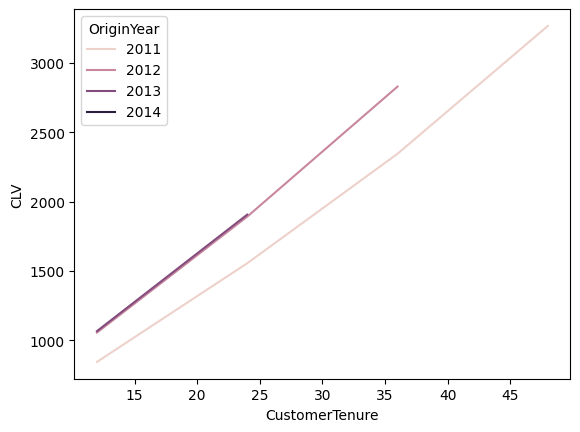

In [285]:
sns.lineplot(x = df_final_trans['CustomerTenure'], y = df_final_trans['CLV'], hue = df_final_trans['OriginYear'])
plt.show()

In [286]:
#Volume weighted average
# We take the average of each age group over all the years to arrive at the following
df_final_trans.groupby('CustomerTenure')['CLV'].mean()

CustomerTenure
12     955.355953
24    1785.016169
36    2587.085688
48    3265.922131
Name: CLV, dtype: float64

## Step 7: Interpretation

1. How much have customers acquired in 2011 spent to date?
- Customers acquired in 2011 have spent 3266 dollars up to date.
- A CLV of 3266 dollars means that, on average, each customer in that particular group (by tenure and origin year) is expected to bring that amount in revenue to the company over their lifecycle.
2. Does each group of customers exhibit similar or different patterns of spending? What’s the implication for the business?
- All groups (2011-2014) show an upward trend, this means that the CLV increases with Customer Tenure across all groups. Specifically, the group from 2011 shows a slightly higher overall CLV than the other groups. The later years (2012-2014) have overlapping lines, suggesting these customers follow very similar spending patterns, with only some differences between them.
- Business Implication: I believe that the business should consider investing in strategies that increase the tenure of newer customers or analyze what factors contributed to the higher CLV of older customers (e.g., specific promotions or relationship-building tactics). Maintaining customer engagement over time also seems important, as longer-tenured customers tend to be more valuable across all groups.